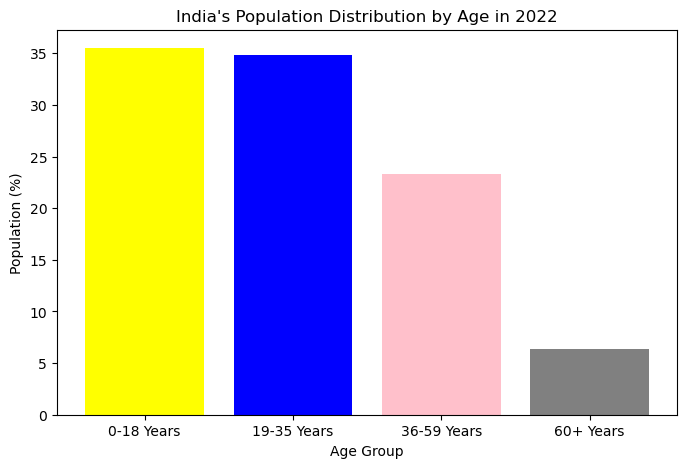

In [12]:
#Task 1
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "Age Group": ["0-18 Years", "19-35 Years", "36-59 Years", "60+ Years"],
    "Population (%)": [35.5, 34.8, 23.3, 6.4]
}

df = pd.DataFrame(data)
plt.figure(figsize=(8, 5))
plt.bar(df["Age Group"], df["Population (%)"], color=['yellow', 'blue', 'pink', 'gray'])
plt.xlabel("Age Group")
plt.ylabel("Population (%)")
plt.title("India's Population Distribution by Age in 2022")
plt.show()




🔹 Model Accuracy: 0.9017

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.57      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905


🔹 Confusion Matrix:
 [[779  28]
 [ 61  37]]


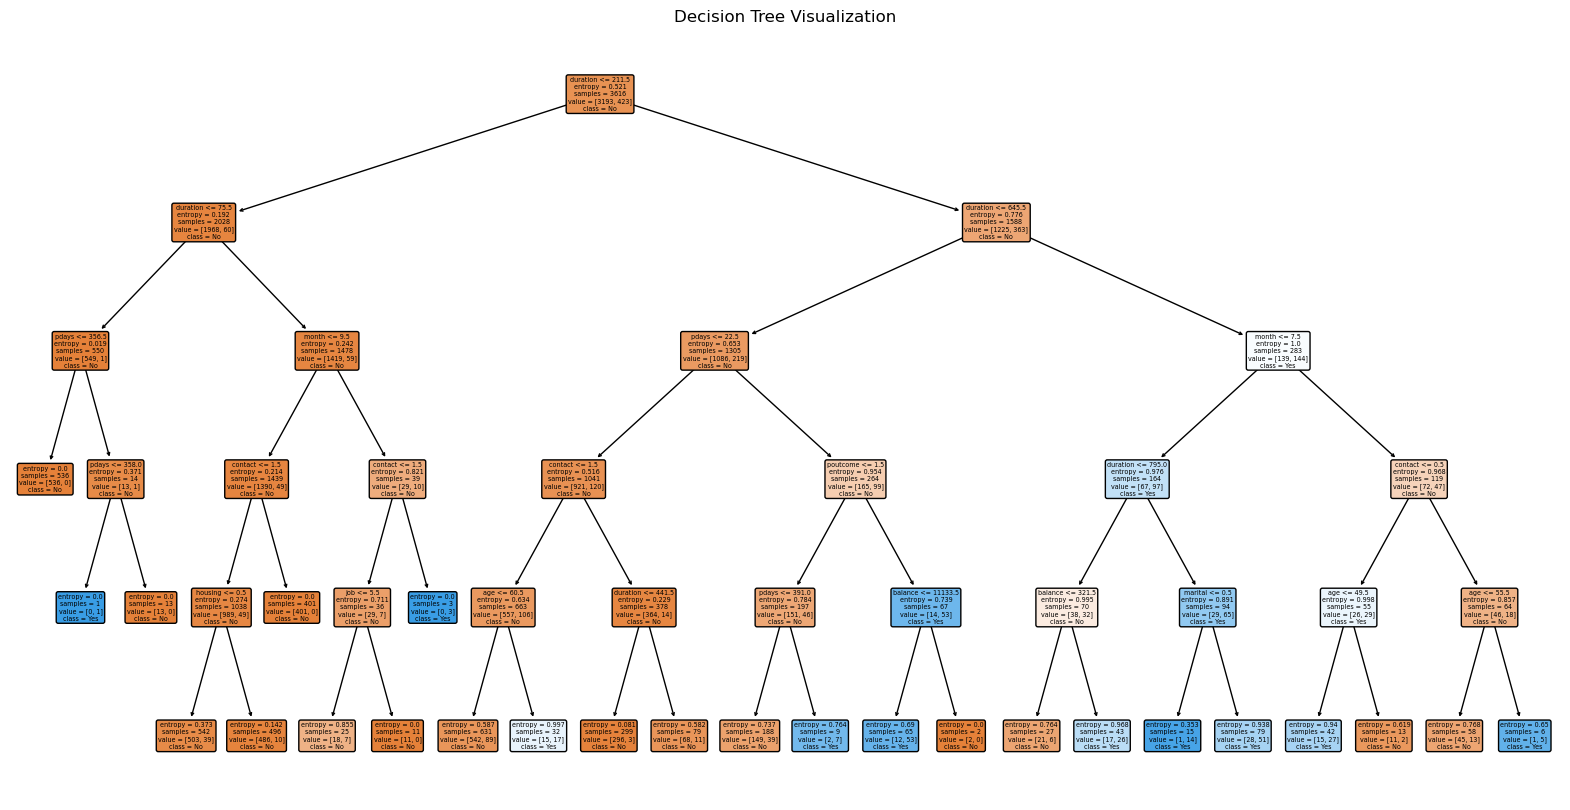

In [13]:
#Task 3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv("bank.csv", sep=";")  
df.columns = df.columns.str.strip().str.replace('"', '')

target_column = 'y'
if target_column not in df.columns:
    raise KeyError("Error: 'y' column not found in dataset!")

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  
X = df.drop(columns=[target_column])  
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Model Accuracy: {accuracy:.4f}")
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
